In [ ]:
!git clone https://github.com/theAIGuysCode/tensorflow-yolov4-tflite.git

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 912, done.
remote: Total 912 (delta 0), reused 0 (delta 0), pack-reused 912
Receiving objects: 100% (912/912), 211.46 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (441/441), done.


In [ ]:
%cd tensorflow-yolov4-tflite/

/content/tensorflow-yolov4-tflite


In [ ]:
pwd

'/content/tensorflow-yolov4-tflite'

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 28.7 MB 1.2 MB/s 
     |████████████████████████████████| 320.4 MB 9.5 kB/s 
     |████████████████████████████████| 3.0 MB 66.5 MB/s 
     |████████████████████████████████| 20.1 MB 14.4 MB/s 
     |████████████████████████████████| 2.9 MB 63.7 MB/s 
     |████████████████████████████████| 459 kB 78.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'0001 (1).jpg'
'0001 (2).jpg'
 0001.jpg
'0004 (1).jpg'
'0004 (2).jpg'
 0004.jpg
 2-Aurélien-Géron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O’Reilly-Media-2019.pdf
'Alcohol Survey .gsheet'
 AN261791.pdf
 Apply
 ColabNotebooks
'Colab Notebooks'
'College Students.jpeg'
'Contact Information.gform'
'Copy of CV_BPGangadhar.pdf'
'Copy of Masters-Transcript.pdf'
'Cover Letter.docx'
'CV_BPGangadhar (1).pdf'
 CV_BPGangadhar.docx
 CV_BPGangadhar.gdoc
 CV_BPGangadhar.pdf
 CV.pdf
 FD1.gdraw
 FD2.gdraw
 FD3.gdraw
 FD4.gdraw
 FD5.gdraw
 FD6.gdraw
'Gangadhar-190527-a-MV Riedberg 1 03 12-dnak.pdf'
'Gangadhar_Cover Letter.pdf'
 Gecko.gdraw
'Getting started.pdf'
'Google Earth'
'My Drive'
 resume
'student card (1).jpg'
'student card.jpg'
'Students .gsheet'
'Study guide'
 Summer2021_page-0001.jpg
 tensorFlowmodel
 tflite_model
'Untitled form.gform'
 yolo_data
'Zimmer ques.pdf'


In [ ]:
!cp /mydrive/tensorFlowmodel/yolov4.weights -d /content/tensorflow-yolov4-tflite/data/

In [ ]:
pwd

'/content'

In [ ]:
%cd tensorflow-yolov4-tflite/


/content/tensorflow-yolov4-tflite


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
#Convert darknet weights to tensorFlow and .pb file 
!python save_model.py --weights ./data/yolov4.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4

2022-01-22 15:16:31.631697: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-22 15:16:33.069133: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-22 15:16:33.121658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-22 15:16:33.122241: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-22 15:16:33.122278: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-22 15:16:33.282304: I tensorflow/stream_executor/pl

In [ ]:
#copy test image to images folder 
!cp /mydrive/yolo_data/testimage.jfif -d /content/tensorflow-yolov4-tflite/data/images/

In [ ]:
!cp /mydrive/yolo_data/car.jpg -d /content/tensorflow-yolov4-tflite/data/images/

In [ ]:
!python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/car.jpg


2022-01-06 23:22:11.480918: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-06 23:22:13.317265: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-06 23:22:13.337026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-06 23:22:13.338010: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-06 23:22:13.338064: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-06 23:22:13.348423: I tensorflow/stream_executor/pl

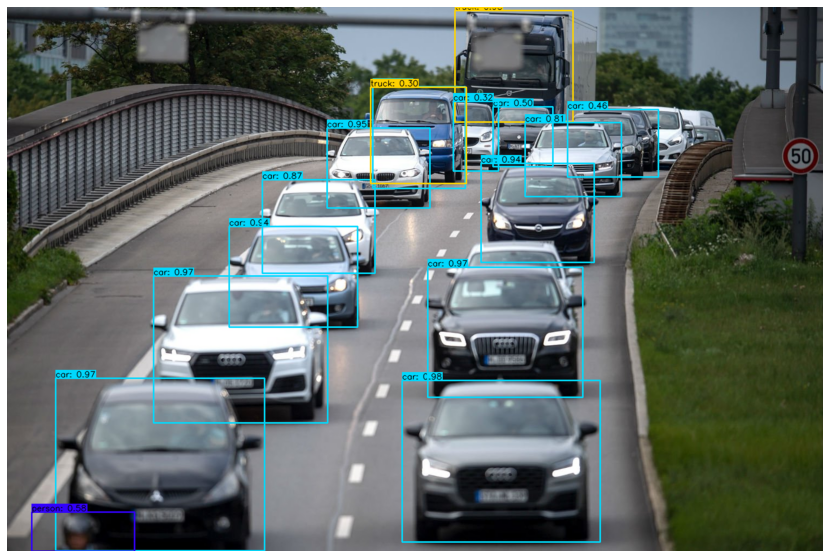

In [ ]:
imShow('detections/detection1.png')

In [ ]:
!python detect_video.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --video 0 --output ./detections/results.avi

2022-01-06 23:23:48.649072: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-06 23:23:50.520961: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-06 23:23:50.540793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-06 23:23:50.541842: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-06 23:23:50.541894: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-06 23:23:50.543859: I tensorflow/stream_executor/pl

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
!python detect_video.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --video ./data/video/video.mp4 --output ./detections/results.avi


2022-01-06 23:37:47.918432: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-06 23:37:49.838819: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-06 23:37:49.843018: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-06 23:37:49.843079: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 37b390aef486
2022-01-06 23:37:49.843107: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 37b390aef486
2022-01-06 23:37:49.843206: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.32.3
2022-01-06 23:37:49.843252: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.32.3
2022-01-06 23:37:49.843276: I tensorflow/st

In [ ]:
imShow('detections/results.avi')

AttributeError: ignored

In [ ]:
#save tf lite model now 
!python save_model.py --weights ./data/yolov4.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 --framework tflite

2022-01-22 15:21:31.280153: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-22 15:21:32.890301: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-22 15:21:32.903776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-22 15:21:32.904341: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-22 15:21:32.904383: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-22 15:21:32.906388: I tensorflow/stream_executor/pl

In [ ]:
%cd data/

/content/tensorflow-yolov4-tflite/data


In [ ]:
!mkdir coco_dataset

In [ ]:
% cd ..

/content/tensorflow-yolov4-tflite


In [ ]:
# download weights
!./scripts/get_coco_dataset_2017.sh

Streaming output truncated to the last 5000 lines.
 extracting: coco/images/val2017/000000463918.jpg  
 extracting: coco/images/val2017/000000365745.jpg  
 extracting: coco/images/val2017/000000320425.jpg  
 extracting: coco/images/val2017/000000481404.jpg  
 extracting: coco/images/val2017/000000314294.jpg  
 extracting: coco/images/val2017/000000335328.jpg  
 extracting: coco/images/val2017/000000513688.jpg  
 extracting: coco/images/val2017/000000158548.jpg  
 extracting: coco/images/val2017/000000132116.jpg  
 extracting: coco/images/val2017/000000415238.jpg  
 extracting: coco/images/val2017/000000321333.jpg  
 extracting: coco/images/val2017/000000081738.jpg  
 extracting: coco/images/val2017/000000577584.jpg  
 extracting: coco/images/val2017/000000346905.jpg  
 extracting: coco/images/val2017/000000433980.jpg  
 extracting: coco/images/val2017/000000228144.jpg  
 extracting: coco/images/val2017/000000041872.jpg  
 extracting: coco/images/val2017/000000117492.jpg  
 extracting: 

In [ ]:
!python convert_tflite.py --weights ./checkpoints/yolov4-416 --output ./checkpoints/yolov4-416-int8.tflite --quantize_mode int8 --dataset ./data/dataset/val2017.txt

2022-01-22 16:06:45.557506: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-22 16:06:47.256483: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-22 16:06:47.257354: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-22 16:06:47.271185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-22 16:06:47.271783: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-22 16:06:47.271815: I tensorflow/stream_executor/platform/def

In [ ]:
%cd /content/tensorflow-yolov4-tflite/
import tensorflow as tf
tf.__version__

/content/tensorflow-yolov4-tflite


'2.4.0'

In [ ]:
!pip install tensorFlow==2.4.0

     |████████████████████████████████| 394.7 MB 18 kB/s 
     |████████████████████████████████| 14.8 MB 51.9 MB/s 
     |████████████████████████████████| 3.8 MB 63.1 MB/s 
     |████████████████████████████████| 462 kB 76.3 MB/s 
     |████████████████████████████████| 5.8 MB 60.8 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68715 sha256=3e894b30f9837bdc7318895a98f417c6fab364acbc018f037a18d70e9aa33e91
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: grpcio
    Found existing installatio

In [ ]:
## Install edgetpu compiler
%%bash
curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
sudo apt-get update
sudo apt-get install edgetpu-compiler

OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,823 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  56377      0 --:--:-- --:--:-- --:--:-- 56377
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
/content/tensorflow-yolov4-tflite/checkpoints/yolov4-416-int8.tflite

In [ ]:
!edgetpu_compiler -s /content/tensorflow-yolov4-tflite/checkpoints/yolov4-416-int8.tflite

Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 336 ms.

Input model: /content/tensorflow-yolov4-tflite/checkpoints/yolov4-416-int8.tflite
Input size: 62.71MiB
Output model: yolov4-416-int8_edgetpu.tflite
Output size: 62.44MiB
On-chip memory used for caching model parameters: 3.00KiB
On-chip memory remaining for caching model parameters: 7.90MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 1038
Operation log: yolov4-416-int8_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 1
Number of operations that will run on CPU: 1037

Operator   

In [ ]:
from google.colab import files
import glob

%cd /content/
for file in glob.glob('./*edgetpu.tflite'):
   files.download(file)

/content
